In [3]:
import numpy as np
import re
from PIL import Image
import argparse
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential,Model
from keras.applications import xception
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model

In [4]:
def get_data(data_dir):
    data = []
    images=[]
    labels=["O","R"]
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            image= os.path.join(path,img)
            image = tf.io.read_file(image)
            image = tf.io.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (200,200))
            image = tf.cast(image, tf.float64)
            data.append(image)
            images.append(class_num)
    return tf.stack(data),images

In [5]:
train,train_val =get_data('C:\My files\project\DATASET\TRAIN2')
print(type(train),type(train_val))
print(train,train_val)

test,test_val =get_data('C:\My files\project\DATASET\TEST2')
print(test,test_val)

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>
tf.Tensor(
[[[[255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   ...
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]]

  [[255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   ...
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]]

  [[255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   ...
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]]

  ...

  [[255.         255.         255.        ]
   [255.         255.         255.        ]
   [25

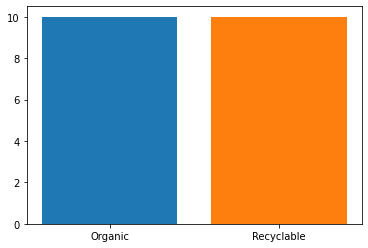

In [14]:
plot_array = []
o=0
r=0
for i in train_val:
    if(i== 0):
        plot_array.append("Organic")
        o+=1
    else:
        plot_array.append("Recyclable")
        r+=1
        
plt.bar("Organic",o)
plt.bar("Recyclable",r)
plt.show()

In [15]:
def cnn_model():
    
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(200,200,3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    model.add(Flatten())
              
    model.summary()
              
    return model


In [18]:
model = cnn_model()
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
train_val=tf.cast(list(map(int,train_val)),tf.int32)
test_val=tf.cast(list(map(int,test_val)),tf.int32)
#train_val=tf.reshape(train_val,(-1,1))
fitting_model=model.fit(x =train,y=train_val,validation_split=0.1,epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 198, 198, 32)      9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 94, 94, 64)       

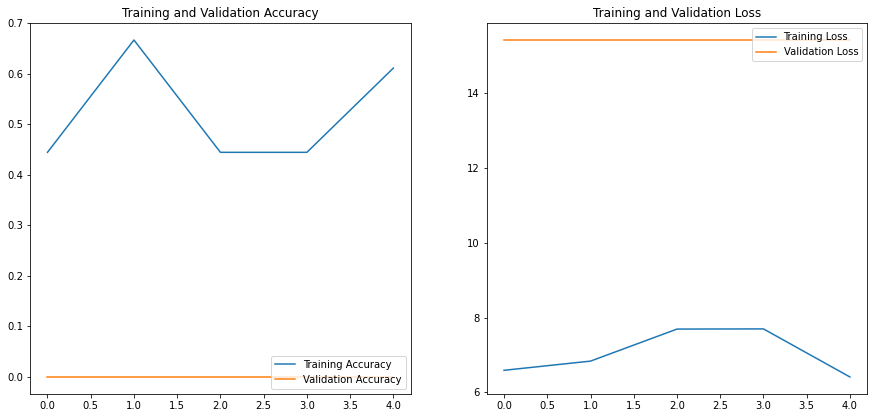

In [19]:
assign = {'0':'Organic','1':"Inorganic"}
epochs_range = range(5)
acc = fitting_model.history['accuracy']
val_acc = fitting_model.history['val_accuracy']
loss = fitting_model.history['loss']
val_loss = fitting_model.history['val_loss']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'tensorflow' is not defined

^C
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [23]:
pip 

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "update"

